In [156]:
#https://github.com/parthvshah/lbw-classification

In [157]:
import pandas as pd #importing pandas for data science essentials
import matplotlib.pyplot as plt #importing matplotlib.pyplot for essential graphical output
import seaborn as sns #importing seaborn for enhanced graphical output
import numpy as np #importing numpy for mathematical essentials
import statsmodels.formula.api as smf # linear regression (statsmodels)
from sklearn.model_selection import train_test_split  # train/test split
from sklearn.linear_model import LinearRegression # linear regression (scikit-learn)


In [158]:
# specifying file name
file = './birthweight_low.xlsx'

# setting pandas print options
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

# reading the file into Python
birthweight = pd.read_excel (io = file)

# outputting the first ten rows of the dataset
birthweight.head(n = 10)

,mage,meduc,monpre,npvis,fage,feduc,omaps,fmaps,cigs,drink,male,mwhte,mblck,moth,fwhte,fblck,foth,bwght
0,69,NaN,5,2.0,62,NaN,4,7,23,9,1,0,1,0,0,1,0,697
1,68,12.0,3,10.0,61,11.0,4,6,25,11,1,1,0,0,1,0,0,1290
2,71,12.0,3,6.0,46,12.0,2,7,21,12,1,0,1,0,0,1,0,1490
3,59,16.0,1,8.0,48,16.0,7,8,21,10,0,0,0,1,0,0,1,1720
4,48,12.0,4,6.0,39,12.0,2,9,17,13,0,1,0,0,1,0,0,1956
5,67,11.0,4,8.0,40,8.0,4,9,16,14,0,1,0,0,1,0,0,1984
6,54,12.0,2,12.0,46,12.0,9,9,17,12,1,0,1,0,0,1,0,2050
7,71,14.0,4,7.0,51,11.0,9,8,15,13,0,1,0,0,1,0,0,2068
8,56,12.0,1,9.0,53,14.0,8,9,14,9,1,1,0,0,1,0,0,2148
9,58,12.0,2,12.0,61,16.0,9,9,13,6,0,0,1,0,0,1,0,2180


In [159]:
#Creating new columns with missing values
for col in birthweight:
    if birthweight[col].isnull().sum() > 0:
         birthweight['m_'+ col] = birthweight[col].isnull().astype(int)
            
birthweight['mv_sum'] = 0

for col in birthweight:
    if col[:2] == 'm_':
        birthweight['mv_sum'] = birthweight[col] + birthweight['mv_sum']      

print(f"""
Sums of Missing Value Flags
--------------------------
{birthweight.iloc[ : , -4:-1].sum(axis = 0)}

""")
    
# printing results
print(birthweight.columns)


Sums of Missing Value Flags
--------------------------
m_meduc    3
m_npvis    3
m_feduc    7
dtype: int64


Index(['mage', 'meduc', 'monpre', 'npvis', 'fage', 'feduc', 'omaps', 'fmaps', 'cigs', 'drink', 'male', 'mwhte', 'mblck', 'moth', 'fwhte', 'fblck', 'foth', 'bwght', 'm_meduc', 'm_npvis', 'm_feduc', 'mv_sum'], dtype='object')


In [160]:
## Imputing Medians for Possible NaN
### Calculating the medians for each column
meduc_median        = birthweight['meduc']         .median()
npvis_median        = birthweight['npvis']         .median()
feduc_median        = birthweight['feduc']         .median()

### Imputing
birthweight['meduc']         .fillna(value = meduc_median,           inplace = True)
birthweight['npvis']         .fillna(value = npvis_median,           inplace = True)
birthweight['feduc']         .fillna(value = feduc_median,           inplace = True)

# Checking for Missing Values
print(birthweight.iloc[ : , : 18].isnull().any())


mage      False
meduc     False
monpre    False
npvis     False
fage      False
feduc     False
omaps     False
fmaps     False
cigs      False
drink     False
male      False
mwhte     False
mblck     False
moth      False
fwhte     False
fblck     False
foth      False
bwght     False
dtype: bool


In [161]:
# Making clear dataset without helping columns
## Dropping the "'m_'+col" columns
for col in birthweight:
    if 'm_' in col:
        birthweight.drop(col, inplace = True, axis = 1)

## Dropping the "missing_values_sum" column
birthweight.drop('mv_sum', inplace = True, axis = 1)
  
# Checking the result with head()
birthweight.head(n = 5)

,mage,meduc,monpre,npvis,fage,feduc,omaps,fmaps,cigs,drink,male,mwhte,mblck,moth,fwhte,fblck,foth,bwght
0,69,14.0,5,2.0,62,14.0,4,7,23,9,1,0,1,0,0,1,0,697
1,68,12.0,3,10.0,61,11.0,4,6,25,11,1,1,0,0,1,0,0,1290
2,71,12.0,3,6.0,46,12.0,2,7,21,12,1,0,1,0,0,1,0,1490
3,59,16.0,1,8.0,48,16.0,7,8,21,10,0,0,0,1,0,0,1,1720
4,48,12.0,4,6.0,39,12.0,2,9,17,13,0,1,0,0,1,0,0,1956


In [162]:
#drop omaps and fmaps- since the vent occurs after birth.
birthweight.drop('omaps', inplace = True, axis = 1)
birthweight.drop('fmaps', inplace = True, axis = 1)
# Checking the result
birthweight.head(n = 5 )

,mage,meduc,monpre,npvis,fage,feduc,cigs,drink,male,mwhte,mblck,moth,fwhte,fblck,foth,bwght
0,69,14.0,5,2.0,62,14.0,23,9,1,0,1,0,0,1,0,697
1,68,12.0,3,10.0,61,11.0,25,11,1,1,0,0,1,0,0,1290
2,71,12.0,3,6.0,46,12.0,21,12,1,0,1,0,0,1,0,1490
3,59,16.0,1,8.0,48,16.0,21,10,0,0,0,1,0,0,1,1720
4,48,12.0,4,6.0,39,12.0,17,13,0,1,0,0,1,0,0,1956


In [163]:
#getting info of dataframe
birthweight.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196 entries, 0 to 195
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   mage    196 non-null    int64  
 1   meduc   196 non-null    float64
 2   monpre  196 non-null    int64  
 3   npvis   196 non-null    float64
 4   fage    196 non-null    int64  
 5   feduc   196 non-null    float64
 6   cigs    196 non-null    int64  
 7   drink   196 non-null    int64  
 8   male    196 non-null    int64  
 9   mwhte   196 non-null    int64  
 10  mblck   196 non-null    int64  
 11  moth    196 non-null    int64  
 12  fwhte   196 non-null    int64  
 13  fblck   196 non-null    int64  
 14  foth    196 non-null    int64  
 15  bwght   196 non-null    int64  
dtypes: float64(3), int64(13)
memory usage: 24.6 KB


In [164]:
# descriptive statistics for numeric data
birthweight.describe(include = 'number').round(2)

,mage,meduc,monpre,npvis,fage,feduc,cigs,drink,male,mwhte,mblck,moth,fwhte,fblck,foth,bwght
count,196.00,196.00,196.00,196.00,196.00,196.00,196.00,196.00,196.00,196.00,196.00,196.00,196.00,196.00,196.00,196.00
mean,40.15,13.91,2.34,11.61,39.29,13.85,10.93,5.40,0.55,0.27,0.38,0.35,0.35,0.34,0.31,3334.09
std,10.25,2.04,1.36,4.23,8.98,2.59,6.10,3.00,0.50,0.45,0.49,0.48,0.48,0.48,0.46,646.70
min,23.00,8.00,1.00,2.00,23.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,697.00
25%,33.00,12.00,2.00,10.00,34.75,12.00,6.00,4.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2916.25
50%,39.00,14.00,2.00,12.00,38.00,14.00,11.00,5.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,3452.00
75%,46.00,16.00,3.00,12.00,43.00,16.00,15.25,7.25,1.00,1.00,1.00,1.00,1.00,1.00,1.00,3759.50
max,71.00,17.00,8.00,35.00,73.00,17.00,25.00,14.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,4933.00


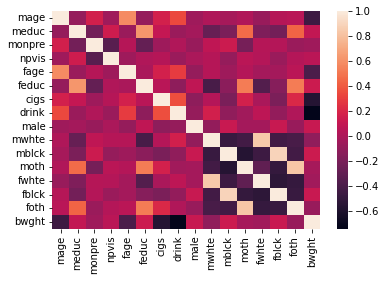

In [165]:
# linear (Pearson) correlation
birthweight_corr = birthweight.corr(method = 'pearson').round(decimals = 2)

# instantiating a heatmap
sns.heatmap(birthweight_corr)


# displaying the plot
plt.show()


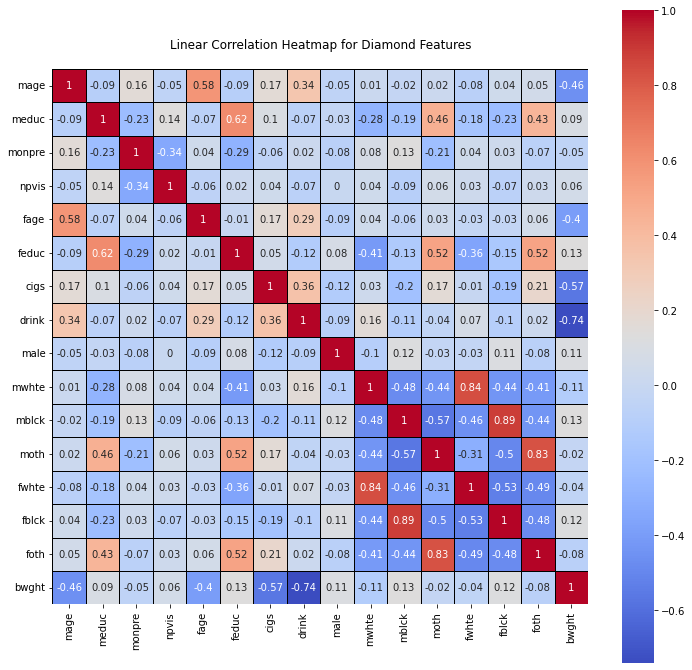

In [166]:
# specifying plot size (making it bigger)
fig, ax = plt.subplots(figsize=(12,12))


# developing a coolwarm heatmap
sns.heatmap(data       = birthweight_corr, # the correlation matrix
            cmap       = 'coolwarm',    # changing to MEDIUM colors
            square     = True,          # tightening the layout
            annot      = True,          # should there be numbers in the heatmap
            linecolor  = 'black',       # lines between boxes
            linewidths = 0.5)           # how thick should the lines be?


# title and displaying the plot
plt.title("""
Linear Correlation Heatmap for Diamond Features
""")
#Displaying output
plt.show()

In [167]:
#Getting dataframe information
birthweight.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196 entries, 0 to 195
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   mage    196 non-null    int64  
 1   meduc   196 non-null    float64
 2   monpre  196 non-null    int64  
 3   npvis   196 non-null    float64
 4   fage    196 non-null    int64  
 5   feduc   196 non-null    float64
 6   cigs    196 non-null    int64  
 7   drink   196 non-null    int64  
 8   male    196 non-null    int64  
 9   mwhte   196 non-null    int64  
 10  mblck   196 non-null    int64  
 11  moth    196 non-null    int64  
 12  fwhte   196 non-null    int64  
 13  fblck   196 non-null    int64  
 14  foth    196 non-null    int64  
 15  bwght   196 non-null    int64  
dtypes: float64(3), int64(13)
memory usage: 24.6 KB


In [168]:
# creating a list of continuous features (including bwght)
continuous_data = [ 'mage',
                    'meduc',
                    'monpre',
                    'fage',
                    'feduc',
                    'bwght']
# developing a correlation matrix based on continuous features
birthweightCont_corr = birthweight[continuous_data].corr(method = 'pearson')

# filtering the results to only show correlations with Sale_Price
birthweightCont_corr.loc[ : , "bwght"].round(decimals = 2).sort_values(ascending = False)

bwght     1.00
feduc     0.13
meduc     0.09
monpre   -0.05
fage     -0.40
mage     -0.46
Name: bwght, dtype: float64

In [169]:
# creating a list of Interval Data features (including Sale_Price)
interval_data = ['npvis',
                  'cigs',
                  'drink',
                  "bwght"]
# developing a correlation matrix based on continuous features
birthweightInt_corr = birthweight[interval_data].corr(method = 'pearson')

# filtering the results to only show correlations with Sale_Price
birthweightInt_corr.loc[ : , "bwght"].round(decimals = 2).sort_values(ascending = False)

bwght    1.00
npvis    0.06
cigs    -0.57
drink   -0.74
Name: bwght, dtype: float64

Continous Variable- Feature Enginering

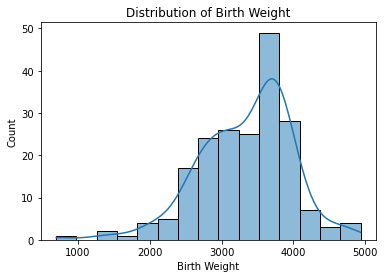

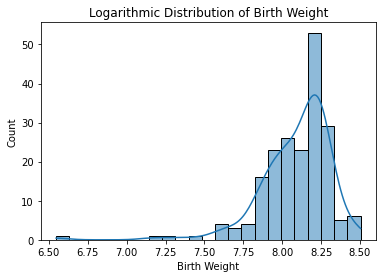

In [170]:
# developing a histogram using HISTPLOT
sns.histplot(data   = birthweight,
          x      = 'bwght',
          kde    = True)


# title and axis labels
plt.title(label   = "Distribution of Birth Weight")
plt.xlabel(xlabel = "Birth Weight") # avoiding using dataset labels
plt.ylabel(ylabel = "Count")

# displaying the histogram
plt.show()

# log transforming bwght and saving it to the dataset
birthweight['log_bwght'] = np.log(birthweight['bwght'])

# developing a histogram using HISTPLOT
sns.histplot(data   = birthweight,
          x      = 'log_bwght',
          kde    = True)


# title and axis labels
plt.title(label   = "Logarithmic Distribution of Birth Weight")
plt.xlabel(xlabel = "Birth Weight") # avoiding using dataset labels
plt.ylabel(ylabel = "Count")

# displaying the histogram
plt.show()

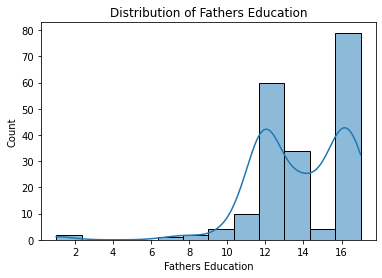

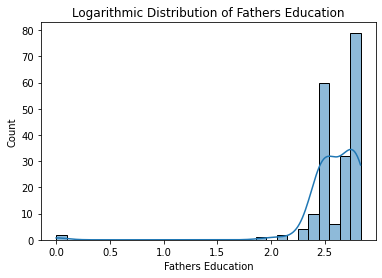

In [171]:
# developing a histogram using HISTPLOT
sns.histplot(data   = birthweight,
          x      = 'feduc',
          kde    = True)


# title and axis labels
plt.title(label   = "Distribution of Fathers Education")
plt.xlabel(xlabel = "Fathers Education") # avoiding using dataset labels
plt.ylabel(ylabel = "Count")

# displaying the histogram
plt.show()

# log transforming bwght and saving it to the dataset
birthweight['log_feduc'] = np.log(birthweight['feduc'])

# developing a histogram using HISTPLOT
sns.histplot(data   = birthweight,
          x      = 'log_feduc',
          kde    = True)


# title and axis labels
plt.title(label   = "Logarithmic Distribution of Fathers Education")
plt.xlabel(xlabel = "Fathers Education") # avoiding using dataset labels
plt.ylabel(ylabel = "Count")

# displaying the histogram
plt.show()

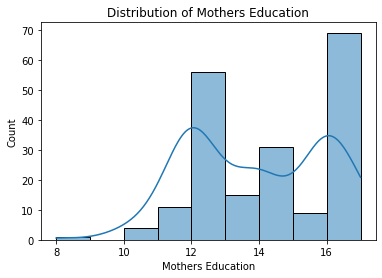

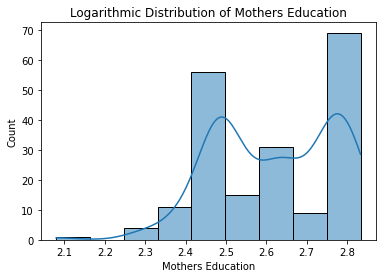

In [172]:
# developing a histogram using HISTPLOT
sns.histplot(data   = birthweight,
          x      = 'meduc',
          kde    = True)


# title and axis labels
plt.title(label   = "Distribution of Mothers Education")
plt.xlabel(xlabel = "Mothers Education") # avoiding using dataset labels
plt.ylabel(ylabel = "Count")

# displaying the histogram
plt.show()

# log transforming bwght and saving it to the dataset
birthweight['log_meduc'] = np.log(birthweight['meduc'])

# developing a histogram using HISTPLOT
sns.histplot(data   = birthweight,
          x      = 'log_meduc',
          kde    = True)


# title and axis labels
plt.title(label   = "Logarithmic Distribution of Mothers Education")
plt.xlabel(xlabel = "Mothers Education") # avoiding using dataset labels
plt.ylabel(ylabel = "Count")

# displaying the histogram
plt.show()

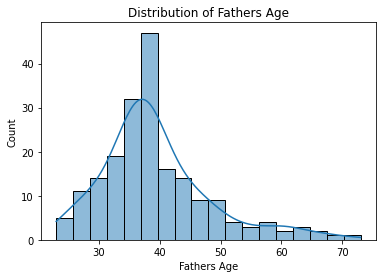

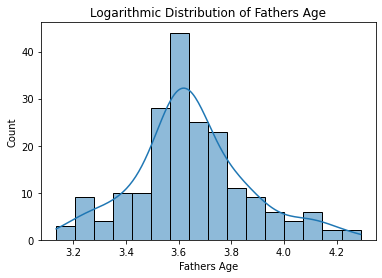

In [173]:
# developing a histogram using HISTPLOT
sns.histplot(data   = birthweight,
          x      = 'fage',
          kde    = True)


# title and axis labels
plt.title(label   = "Distribution of Fathers Age")
plt.xlabel(xlabel = "Fathers Age") # avoiding using dataset labels
plt.ylabel(ylabel = "Count")

# displaying the histogram
plt.show()

# log transforming bwght and saving it to the dataset
birthweight['log_fage'] = np.log(birthweight['fage'])

# developing a histogram using HISTPLOT
sns.histplot(data   = birthweight,
          x      = 'log_fage',
          kde    = True)


# title and axis labels
plt.title(label   = "Logarithmic Distribution of Fathers Age")
plt.xlabel(xlabel = "Fathers Age") # avoiding using dataset labels
plt.ylabel(ylabel = "Count")

# displaying the histogram
plt.show()

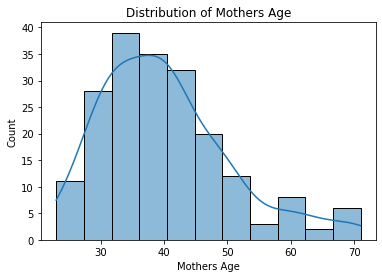

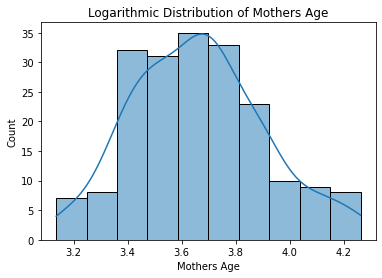

In [174]:
# developing a histogram using HISTPLOT
sns.histplot(data   = birthweight,
          x      = 'mage',
          kde    = True)


# title and axis labels
plt.title(label   = "Distribution of Mothers Age")
plt.xlabel(xlabel = "Mothers Age") # avoiding using dataset labels
plt.ylabel(ylabel = "Count")

# displaying the histogram
plt.show()

# log transforming bwght and saving it to the dataset
birthweight['log_mage'] = np.log(birthweight['mage'])

# developing a histogram using HISTPLOT
sns.histplot(data   = birthweight,
          x      = 'log_mage',
          kde    = True)


# title and axis labels
plt.title(label   = "Logarithmic Distribution of Mothers Age")
plt.xlabel(xlabel = "Mothers Age") # avoiding using dataset labels
plt.ylabel(ylabel = "Count")

# displaying the histogram
plt.show()

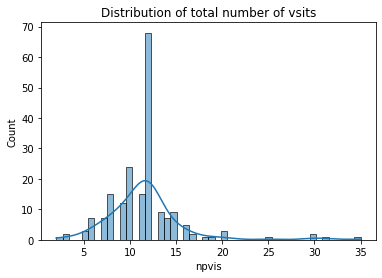

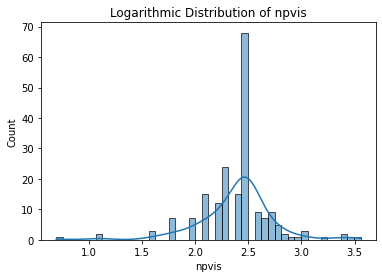

In [175]:
# developing a histogram using HISTPLOT
sns.histplot(data   = birthweight,
          x      = 'npvis',
          kde    = True)


# title and axis labels
plt.title(label   = "Distribution of total number of vsits")
plt.xlabel(xlabel = "npvis") # avoiding using dataset labels
plt.ylabel(ylabel = "Count")

# displaying the histogram
plt.show()

# log transforming bwght and saving it to the dataset
birthweight['log_npvis'] = np.log(birthweight['npvis'])

# developing a histogram using HISTPLOT
sns.histplot(data   = birthweight,
          x      = 'log_npvis',
          kde    = True)


# title and axis labels
plt.title(label   = "Logarithmic Distribution of npvis")
plt.xlabel(xlabel = "npvis") # avoiding using dataset labels
plt.ylabel(ylabel = "Count")

# displaying the histogram
plt.show()

In [176]:
# counting the number of one
Is_Male           = len(birthweight['male'][birthweight['male'] == 1])
Mother_Is_White   = len(birthweight['mwhte'][birthweight['mwhte'] == 1])
Mother_Is_Black   = len(birthweight['mblck'][birthweight['mblck'] == 1])
Mother_Is_Other   = len(birthweight['moth'][birthweight['moth'] == 1])
Father_Is_White   = len(birthweight['fwhte'][birthweight['fwhte'] == 1])
Father_Is_Black   = len(birthweight['fblck'][birthweight['fblck'] == 1])
Father_Is_Other   = len(birthweight['foth'][birthweight['foth'] == 1])

# printing a table of the results
print(f"""
                         Yes\t\tNo
                      ---------------------
Baby is Male          | {Is_Male}\t\t{len(birthweight) - Is_Male}
Mother is White       | {Mother_Is_White}\t\t{len(birthweight) - Mother_Is_White}
Mother is Black       | {Mother_Is_Black}\t\t{len(birthweight) - Mother_Is_Black}
Mother is Other       | {Mother_Is_Other}\t\t{len(birthweight) - Mother_Is_Other}
Father is White       | {Father_Is_White}\t\t{len(birthweight) - Father_Is_White}
Father is Black       | {Father_Is_Black}\t\t{len(birthweight) - Father_Is_Black}
Father is Other       | {Father_Is_Other}\t\t{len(birthweight) - Father_Is_Other}

""")


                         Yes		No
                      ---------------------
Baby is Male          | 108		88
Mother is White       | 53		143
Mother is Black       | 75		121
Mother is Other       | 68		128
Father is White       | 68		128
Father is Black       | 67		129
Father is Other       | 61		135




In [177]:
# Step 1: INSTANTIATE a model object
lm_best = smf.ols(formula = """bwght ~ mage +                                 
                                       cigs +
                                    drink + 
                                        moth +
                                         foth +
                                      mwhte +
                                       fwhte +
                                       fblck +
                                       mblck +
                                       mage                             
                                        
""",
                  data = birthweight)

# Step 2: FIT the data into the model object
results = lm_best.fit()


# Step 3: analyze the SUMMARY output
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  bwght   R-squared:                       0.706
Model:                            OLS   Adj. R-squared:                  0.695
Method:                 Least Squares   F-statistic:                     64.57
Date:                Wed, 24 Nov 2021   Prob (F-statistic):           1.12e-46
Time:                        21:18:52   Log-Likelihood:                -1426.0
No. Observations:                 196   AIC:                             2868.
Df Residuals:                     188   BIC:                             2894.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2970.7332     66.826     44.455      0.0

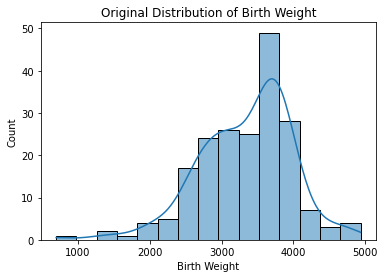

In [178]:
# developing a histogram using HISTPLOT
sns.histplot(data   = birthweight,
          x      = 'bwght',
          kde    = True)


# title and axis labels
plt.title(label   = "Original Distribution of Birth Weight")
plt.xlabel(xlabel = "Birth Weight") # avoiding using dataset labels
plt.ylabel(ylabel = "Count")

# displaying the histogram
plt.show()

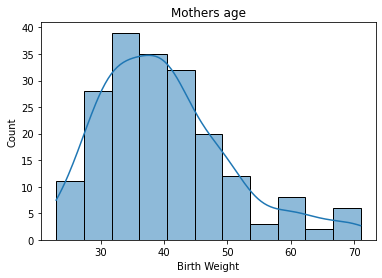

In [179]:
# developing a histogram using HISTPLOT
sns.histplot(data   = birthweight,
          x      = 'mage',
          kde    = True)


# title and axis labels
plt.title(label   = "Mothers age")
plt.xlabel(xlabel = "Birth Weight") # avoiding using dataset labels
plt.ylabel(ylabel = "Count")

# displaying the histogram
plt.show()

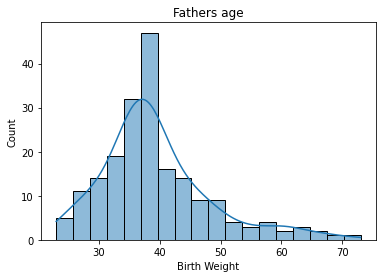

In [180]:
# developing a histogram using HISTPLOT
sns.histplot(data   = birthweight,
          x      = 'fage',
          kde    = True)


# title and axis labels
plt.title(label   = "Fathers age")
plt.xlabel(xlabel = "Birth Weight") # avoiding using dataset labels
plt.ylabel(ylabel = "Count")

# displaying the histogram
plt.show()

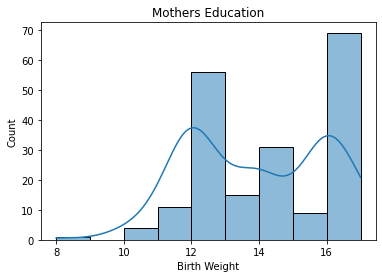

In [181]:
# developing a histogram using HISTPLOT
sns.histplot(data   = birthweight,
          x      = 'meduc',
          kde    = True)


# title and axis labels
plt.title(label   = "Mothers Education")
plt.xlabel(xlabel = "Birth Weight") # avoiding using dataset labels
plt.ylabel(ylabel = "Count")

# displaying the histogram
plt.show()

In [182]:
# log transforming Sale_Price and saving it to the dataset
birthweight['log_meduc'] = np.log(birthweight['meduc'])

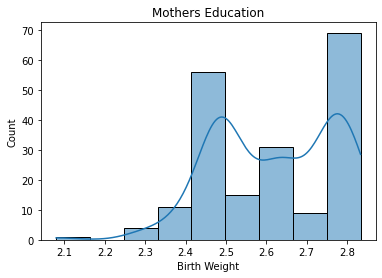

In [183]:
# developing a histogram using HISTPLOT
sns.histplot(data   = birthweight,
          x      = 'log_meduc',
          kde    = True)


# title and axis labels
plt.title(label   = "Mothers Education")
plt.xlabel(xlabel = "Birth Weight") # avoiding using dataset labels
plt.ylabel(ylabel = "Count")

# displaying the histogram
plt.show()

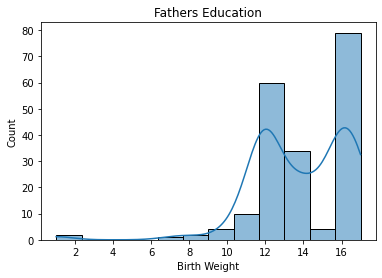

In [184]:

# developing a histogram using HISTPLOT
sns.histplot(data   = birthweight,
          x      = 'feduc',
          kde    = True)


# title and axis labels
plt.title(label   = "Fathers Education")
plt.xlabel(xlabel = "Birth Weight") # avoiding using dataset labels
plt.ylabel(ylabel = "Count")

# displaying the histogram
plt.show()

In [185]:
#Printing first two rows
birthweight.head(2)

,mage,meduc,monpre,npvis,fage,feduc,cigs,drink,male,mwhte,mblck,moth,fwhte,fblck,foth,bwght,log_bwght,log_feduc,log_meduc,log_fage,log_mage,log_npvis
0,69,14.0,5,2.0,62,14.0,23,9,1,0,1,0,0,1,0,697,6.546785,2.639057,2.639057,4.127134,4.234107,0.693147
1,68,12.0,3,10.0,61,11.0,25,11,1,1,0,0,1,0,0,1290,7.162397,2.397895,2.484907,4.110874,4.219508,2.302585


In [186]:
# interacting variable- creating new columns

birthweight['fage_mage'] = birthweight['fage'] * birthweight['mage']
birthweight['feduc_meduc'] = birthweight['feduc'] * birthweight['meduc']


birthweight.head(2)

,mage,meduc,monpre,npvis,fage,feduc,cigs,drink,male,mwhte,mblck,moth,fwhte,fblck,foth,bwght,log_bwght,log_feduc,log_meduc,log_fage,log_mage,log_npvis,fage_mage,feduc_meduc
0,69,14.0,5,2.0,62,14.0,23,9,1,0,1,0,0,1,0,697,6.546785,2.639057,2.639057,4.127134,4.234107,0.693147,4278,196.0
1,68,12.0,3,10.0,61,11.0,25,11,1,1,0,0,1,0,0,1290,7.162397,2.397895,2.484907,4.110874,4.219508,2.302585,4148,132.0


In [187]:
x_variables = ['cigs',
'drink',
'feduc_meduc',
'fage_mage']

In [188]:
# Step 1: INSTANTIATE a model object
lm_best = smf.ols(formula = """bwght ~ cigs +
                                    drink + 
                                        feduc_meduc +
                                         fage_mage """,
                  data = birthweight)
#  monpre 69.8 npvis + 70 feduc +70.1  fage 70.1  meduc +69.5

# Step 2: FIT the data into the model object
results = lm_best.fit()


# Step 3: analyze the SUMMARY output
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  bwght   R-squared:                       0.717
Model:                            OLS   Adj. R-squared:                  0.711
Method:                 Least Squares   F-statistic:                     121.2
Date:                Wed, 24 Nov 2021   Prob (F-statistic):           2.75e-51
Time:                        21:18:53   Log-Likelihood:                -1422.3
No. Observations:                 196   AIC:                             2855.
Df Residuals:                     191   BIC:                             2871.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    4517.1593    113.759     39.708      

In [189]:
# not needed #preparing explanatory variable data
birthweight_data   = birthweight.drop(["bwght",
                                         "cigs",
                                         "drink", 
                                         "feduc_meduc",
                                      "fage_mage"],
                               axis = 1)


# preparing response variables
birthweight_target = birthweight.loc[ : , "bwght"]
log_birthweight_target = birthweight.loc[ : , "log_bwght"]


# preparing training and testing sets (all letters are lowercase)
x_train, x_test, y_train, y_test = train_test_split(
            birthweight_data,
            birthweight_target,
            test_size = 0.25,
            random_state = 219)
#taking the houring data and dividing it into X & Y sets, same for 

# checking the shapes of the datasets
print(f"""
Training Data
-------------
X-side: {x_train.shape}
y-side: {y_train.shape}


Testing Data
------------
X-side: {x_test.shape}
y-side: {y_test.shape}
""")


Training Data
-------------
X-side: (147, 19)
y-side: (147,)


Testing Data
------------
X-side: (49, 19)
y-side: (49,)



In [190]:
#Printing first 5 rows using head()
birthweight_data.head(n=5)

,mage,meduc,monpre,npvis,fage,feduc,male,mwhte,mblck,moth,fwhte,fblck,foth,log_bwght,log_feduc,log_meduc,log_fage,log_mage,log_npvis
0,69,14.0,5,2.0,62,14.0,1,0,1,0,0,1,0,6.546785,2.639057,2.639057,4.127134,4.234107,0.693147
1,68,12.0,3,10.0,61,11.0,1,1,0,0,1,0,0,7.162397,2.397895,2.484907,4.110874,4.219508,2.302585
2,71,12.0,3,6.0,46,12.0,1,0,1,0,0,1,0,7.306531,2.484907,2.484907,3.828641,4.262680,1.791759
3,59,16.0,1,8.0,48,16.0,0,0,0,1,0,0,1,7.450080,2.772589,2.772589,3.871201,4.077537,2.079442
4,48,12.0,4,6.0,39,12.0,0,1,0,0,1,0,0,7.578657,2.484907,2.484907,3.663562,3.871201,1.791759


In [191]:
# applying model in scikit-learn

# Preparing a DataFrame based the the analysis above
ols_data1   = birthweight.loc[ : , x_variables]


# Preparing the target variable
birthweight_target = birthweight.loc[ : , 'bwght']


###############################################
## setting up more than one train-test split ##
###############################################
# FULL X-dataset (normal Y)
x_train_FULL, x_test_FULL, y_train_FULL, y_test_FULL = train_test_split(
            birthweight_data,     # x-variables
            birthweight_target,   # y-variable
            test_size = 0.25,
            random_state = 219)


# OLS p-value x-dataset (normal Y)
x_train_OLS, x_test_OLS, y_train_OLS, y_test_OLS = train_test_split(
            ols_data1,         # x-variables
            birthweight_target,   # y-variable
            test_size = 0.25,
            random_state = 219)


In [192]:
# INSTANTIATING a model object
lr = LinearRegression()


# FITTING to the training data
lr_fit = lr.fit(x_train_OLS, y_train_OLS)


# PREDICTING on new data
lr_pred = lr_fit.predict(x_test_OLS)
#(lr_predict- here is the X_test tell me Y value for it)

# SCORING the results
print('OLS Training Score :', lr.score(x_train_OLS, y_train_OLS).round(4))  # using R-square
print('OLS Testing Score  :',  lr.score(x_test_OLS, y_test_OLS).round(4)) # using R-square
#now it compares the data with y data

#Saving LR score
lr_train_score = lr.score(x_train_OLS, y_train_OLS).round(4) # taking training data and calculate the r ^2
lr_test_score = lr.score(x_test_OLS, y_test_OLS).round(4)

# displaying and saving the gap between training and testing
print('OLS Train-Test Gap :', abs(lr_train_score - lr_test_score).round(4))
lr_test_gap = abs(lr_train_score - lr_test_score).round(4)


#OLS Train-Test Gap -There is a little bit of instability depending upon unpredicted error. <0.05 is acceptable

# assignment- dont go above 0.06

OLS Training Score : 0.7238
OLS Testing Score  : 0.6667
OLS Train-Test Gap : 0.0571


In [193]:
# zipping each feature name to its coefficient
lr_model_values = zip(ols_data1[x_variables].columns,
                      lr_fit.coef_.round(decimals = 2))


# setting up a placeholder list to store model features
lr_model_lst = [('intercept', lr_fit.intercept_.round(decimals = 2))]


# printing out each feature-coefficient pair one by one
for val in lr_model_values:
    lr_model_lst.append(val)
    

# checking the results
for pair in lr_model_lst:
    print(pair)

('intercept', 4516.94)
('cigs', -39.16)
('drink', -103.83)
('feduc_meduc', 1.11)
('fage_mage', -0.24)


In [194]:
#Lasso model importing
import sklearn.linear_model

In [195]:
#we should use full datasets
# INSTANTIATING a model object
lasso_model = sklearn.linear_model.Lasso(alpha = 1.0,
                                         normalize = True) # default magitude
# lasso_model - model object
# INSTANTIATING a model object
#lasso_model = sklearn.linear_model.LinearRegression(alpha = 1.0,
  #                                       normalize = True) # default magitude
# INSTANTIATING a model object
#lasso_model = sklearn.linear_model.knn(alpha = 1.0,
 #                                        normalize = True) # default magitude


# FITTING to the training data
lasso_fit = lasso_model.fit(x_train_OLS, y_train_OLS)


# PREDICTING on new data
lasso_pred = lasso_fit.predict(x_test_OLS)


# SCORING the results
print('Lasso Training Score :', lasso_model.score(x_train_OLS, y_train_OLS).round(4))
print('Lasso Testing Score  :', lasso_model.score(x_test_OLS, y_test_OLS).round(4))


## the following code has been provided for you ##

# saving scoring data for future use
lasso_train_score = lasso_model.score(x_train_OLS, y_train_OLS).round(4) # using R-square
lasso_test_score  = lasso_model.score(x_test_OLS, y_test_OLS).round(4)   # using R-square


# displaying and saving the gap between training and testing
print('Lasso Train-Test Gap :', abs(lasso_train_score - lasso_test_score).round(4))
lasso_test_gap = abs(lasso_train_score - lasso_test_score).round(4)

#lassso precalcualtes and make adjustments so that the model is not over or under fitting.

# take variable that are fresater than 0 and put them in OLS and check.

Lasso Training Score : 0.7228
Lasso Testing Score  : 0.6758
Lasso Train-Test Gap : 0.047


In [196]:
# zipping each feature name to its coefficient
lasso_model_values = zip(ols_data1.columns, lasso_fit.coef_.round(decimals = 2))


# setting up a placeholder list to store model features
lasso_model_lst = [('intercept', lasso_fit.intercept_.round(decimals = 2))]


# printing out each feature-coefficient pair one by one
for val in lasso_model_values:
    lasso_model_lst.append(val)
    

# checking the results
for pair in lasso_model_lst:
    print(pair)
    
#its ok to put M_ colums as well
#lasso cannot account for some mistake - eg the below model has lot area & log Lot area which we know is ok with the model.


('intercept', 4517.21)
('cigs', -37.44)
('drink', -102.64)
('feduc_meduc', 0.9)
('fage_mage', -0.23)


In [197]:
## This code may have to be run more than once ##

# dropping coefficients that are equal to zero

# printing out each feature-coefficient pair one by one
for feature, coefficient in lasso_model_lst:
        
        if coefficient == 0:
            lasso_model_lst.remove((feature, coefficient))

            
# checking the results
for pair in lasso_model_lst:
    print(pair)

('intercept', 4517.21)
('cigs', -37.44)
('drink', -102.64)
('feduc_meduc', 0.9)
('fage_mage', -0.23)


In [198]:
#Develop an ARD model.

In [199]:
# INSTANTIATING a model object
from sklearn.linear_model import ARDRegression
ard_model = ARDRegression()


# FITTING the training data
ard_fit = ard_model.fit(x_train_OLS,y_train_OLS)


# PREDICTING on new data
ard_pred = ard_model.predict(x_test_OLS)


print('Training Score:', ard_model.score(x_train_OLS,y_train_OLS).round(4))
print('Testing Score :',  ard_model.score(x_test_OLS,y_test_OLS).round(4))


# saving scoring data for future use
ard_train_score = ard_model.score(x_train_OLS,y_train_OLS).round(4)
ard_test_score  = ard_model.score(x_test_OLS,y_test_OLS).round(4)


# displaying and saving the gap between training and testing
print('Train-Test Gap :', abs(ard_train_score - ard_test_score).round(4))
ard_test_gap = abs(ard_train_score - ard_test_score).round(4)

Training Score: 0.7233
Testing Score : 0.6749
Train-Test Gap : 0.0484


In [200]:
# zipping each feature name to its coefficient
ard_model_values = zip(birthweight_data.columns, ard_fit.coef_.round(decimals = 5))


# setting up a placeholder list to store model features
ard_model_lst = [('intercept', ard_fit.intercept_.round(decimals = 2))]


# printing out each feature-coefficient pair one by one
for val in ard_model_values:
    ard_model_lst.append(val)
    

# checking the results
for pair in ard_model_lst:
    print(pair)

('intercept', 4552.1)
('mage', -38.26345)
('meduc', -104.65822)
('monpre', 0.86893)
('npvis', -0.23575)


In [201]:
## This code may have to be run more than once ##

# dropping coefficients that are equal to zero

# printing out each feature-coefficient pair one by one
for feature, coefficient in ard_model_lst:
        
        if coefficient == 0:
            ard_model_lst.remove((feature, coefficient))

            
# checking the results
for pair in ard_model_lst:
    print(pair)

('intercept', 4552.1)
('mage', -38.26345)
('meduc', -104.65822)
('monpre', 0.86893)
('npvis', -0.23575)


In [202]:
# comparing results

print(f"""
Model      Train Score      Test Score         Test Gap
-----      -----------      ----------        ------------
OLS        {lr_train_score}        {lr_test_score}          {lr_test_gap}
*Lasso*    {lasso_train_score}        {lasso_test_score}          {lasso_test_gap} <--- Selected model
ARD        {ard_train_score}        {ard_test_score}          {ard_test_gap}
""")






Model      Train Score      Test Score         Test Gap
-----      -----------      ----------        ------------
OLS        0.7238        0.6667          0.0571
*Lasso*    0.7228        0.6758          0.047 <--- Selected model
ARD        0.7233        0.6749          0.0484

